In [3]:
#pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd

# import libraries for plotting
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer 

# hiding warnings
import warnings

warnings.filterwarnings('ignore')

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_curve, roc_auc_score

def plot_roc(preds):
    plt.figure(figsize=(3, 3), dpi=100)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    plt.plot(fpr, tpr)
    plt.text(0.95, 0.05, 'AUC = %0.4f' % roc_auc_score(y_test, preds), ha='right', fontsize=12, weight='bold', color='blue')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
def plot_CF(matrix,model):
    plt.figure(figsize=(4,3))
    ax = sns.heatmap(matrix/np.sum(matrix),fmt='.2%', annot=True, cmap='Blues')

    ax.set_title('{} Confusion Matrix\n\n'.format(model));
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [2]:
# importing dataset
data = './weatherAUS.csv'

df = pd.read_csv(data)

df.shape

(145460, 23)

In [3]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# features

In [4]:
categorical_vars = [var for var in df.columns if df[var].dtype=='O']
print('Number of variables: ',len(categorical_vars))
print('Variables :', categorical_vars)

Number of variables:  7
Variables : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [5]:
for col in categorical_vars:
    df[col] = df[col].replace(np.nan,df[col].mode()[0])

In [6]:
num_cols = []
for col in df:
    if df[col].dtype == 'float64':
        num_cols.append(col)
print('Numerical Cols:',num_cols)

Numerical Cols: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# Null treatment

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

In [ ]:
def numeric_imputer(x,y):
    # After checking the normalization
    # Replacing NaN values to Mean of respective column
    for col in num_cols:
        if col == 'Rainfall':
            x[col] = x[col].replace(np.nan, df[col].median())
        else:
            x[col] = x[col].replace(np.nan, df[col].mean())


    return x,y 

In [7]:
import sklearn.pipeline import Pipe

In [8]:
for index,row in df.iterrows():
    if df['Rainfall'][index] > 0:
        df['RainToday'][index] = 'Yes'

In [9]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [23]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,Yes,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


In [24]:
Labeler = LabelEncoder()
df['RainTomorrow'] = Labeler.fit_transform(df['RainTomorrow'])

In [25]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,Yes,0
1,2008-12-02,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,0
2,2008-12-03,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,0
3,2008-12-04,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,0
4,2008-12-05,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,0
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,0
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,0
145458,2017-06-24,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,0


In [26]:
for i in num_cols:
    IQR= df[i].quantile(.75)-df[i].quantile(.25)
    lower=df[i].quantile(.25) - (1.5 * IQR)
    upper=df[i].quantile(.75) + (1.5 * IQR)
    df[i]=np.where(df[i]<lower,lower,df[i])
    df[i]=np.where(df[i]>upper,upper,df[i])

In [27]:
X = df.drop(['RainTomorrow','Date','Location'],axis=1)
X = pd.get_dummies(data=X, columns=['WindGustDir','WindDir9am','WindDir3pm','RainToday'],drop_first=True)
y= df[['RainTomorrow']]

In [29]:
y

,RainTomorrow
0,0
1,0
2,0
3,0
4,0
...,...
145455,0
145456,0
145457,0
145458,0


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2 = scaler.fit_transform(X)

In [17]:
import shap
shap.initjs()
shap.__version__

'0.41.0'

In [31]:
maxaccu=0
maxRS=0

for i in range(0,200):
    X_train,X_test,y_train,y_test= train_test_split(X2,y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(X_train,y_train)
    pred= LR.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

DT_model= DecisionTreeClassifier(random_state=maxRS)
RFR_model= RandomForestClassifier(random_state=maxRS)
XGB_model= XGBClassifier(random_state=maxRS)
LR = LogisticRegression(random_state=maxRS)
GB_model= GradientBoostingClassifier(random_state=maxRS, learning_rate=0.1)
mlp = MLPClassifier(hidden_layer_sizes=(8,4,2),solver='adam',activation='logistic',max_iter=500)
models = [LR,DT_model, RFR_model, XGB_model, GB_model,mlp]

accuracy=[]
predicts=[]
f1s=[]
for m in models:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    pred = m.predict(X_test)
    f1s.append(f1_score(y_test,pred))
    predicts.append(pred)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    print('Model:',m,' Accuracy:',accuracy)

pd.DataFrame({'Model':models,'Accuracy':accuracy,'F1 Score':f1s})

Best accuracy is  0.848686924240341 on Random State = 166
Model: LogisticRegression(random_state=166)  Accuracy: [84.54]
Model: DecisionTreeClassifier(random_state=166)  Accuracy: [84.54, 78.65]
Model: RandomForestClassifier(random_state=166)  Accuracy: [84.54, 78.65, 85.43]
Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predi

,Model,Accuracy,F1 Score
0,LogisticRegression(random_state=166),84.54,0.576131
1,DecisionTreeClassifier(random_state=166),78.65,0.517182
2,"(DecisionTreeClassifier(max_features='sqrt', r...",85.43,0.587266
3,"XGBClassifier(base_score=None, booster=None, c...",85.48,0.612097
4,([DecisionTreeRegressor(criterion='friedman_ms...,84.95,0.582809
5,"MLPClassifier(activation='logistic', hidden_la...",84.96,0.589376


In [69]:
dataset = df
for col in categorical_vars:
    dataset[col] = Labeler.fit_transform(dataset[col])
dataset = dataset.drop(['Location','Date'],axis=1)
all_cols = dataset.iloc[:,:20].columns

In [71]:
cols = dataset.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [72]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

string = 'RainTomorrow ~ ' + '+'.join(all_cols)
dataset[cols] = scaler.fit_transform(dataset[cols])


y, X = dmatrices(string, data=dataset, return_type='dataframe')

#calculate VIF for each explanatory variable
vif_tomorrow = pd.DataFrame()
vif_tomorrow['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_tomorrow['Features'] = X.columns
vif_tomorrow

,VIF,Features
0,1.000000,Intercept
1,8.396966,MinTemp
2,22.069942,MaxTemp
3,3.887784,Rainfall
4,1.447379,Evaporation
5,1.817290,Sunshine
6,1.615613,WindGustDir
7,2.465250,WindGustSpeed
8,1.279183,WindDir9am
9,1.615124,WindDir3pm


In [78]:
from sklearn.preprocessing import StandardScaler

X = dataset.drop(['RainTomorrow','Date','Location'],axis=1)
X = pd.get_dummies(data=X, columns=['WindGustDir','WindDir9am','WindDir3pm','RainToday'],drop_first=True)
y= dataset[['RainTomorrow']]
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

KeyError: "['Date', 'Location'] not found in axis"

In [79]:
maxaccu=0
maxRS=166

# for i in range(0,200):
#     X_train,X_test,y_train,y_test= train_test_split(X2,y,random_state=i,test_size=.30)
#     LR= LogisticRegression()
#     LR.fit(X_train,y_train)
#     pred= LR.predict(X_test)
#     acc=accuracy_score(y_test,pred)
#     if acc>maxaccu:
#         maxaccu=acc
#         maxRS=i
# print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

DT_model= DecisionTreeClassifier(random_state=maxRS)
RFR_model= RandomForestClassifier(random_state=maxRS)
XGB_model= XGBClassifier(random_state=maxRS)
LR = LogisticRegression(random_state=maxRS)
GB_model= GradientBoostingClassifier(random_state=maxRS, learning_rate=0.1)
mlp = MLPClassifier(hidden_layer_sizes=(8,4,2),solver='adam',activation='logistic',max_iter=500)
models = [LR,DT_model, RFR_model, XGB_model, GB_model,mlp]

accuracy=[]
predicts=[]
f1s=[]
for m in models:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    pred = m.predict(X_test)
    f1s.append(f1_score(y_test,pred))
    predicts.append(pred)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    print('Model:',m.__str__,'Accuracy:',accuracy)

pd.DataFrame({'Model':models,'Accuracy':accuracy,'F1 Score':f1s})

Model: <method-wrapper '__str__' of LogisticRegression object at 0x0000013D6C0DDF30> Accuracy: [84.33]
Model: <method-wrapper '__str__' of DecisionTreeClassifier object at 0x0000013D6C0DE380> Accuracy: [84.33, 77.65]
Model: <method-wrapper '__str__' of RandomForestClassifier object at 0x0000013D6C0DCCD0> Accuracy: [84.33, 77.65, 85.0]
Model: <method-wrapper '__str__' of XGBClassifier object at 0x0000013D6C0DC760> Accuracy: [84.33, 77.65, 85.0, 84.97]
Model: <method-wrapper '__str__' of GradientBoostingClassifier object at 0x0000013D6C0DE1D0> Accuracy: [84.33, 77.65, 85.0, 84.97, 84.88]
Model: <method-wrapper '__str__' of MLPClassifier object at 0x0000013D6C0DDBD0> Accuracy: [84.33, 77.65, 85.0, 84.97, 84.88, 84.77]


,Model,Accuracy,F1 Score
0,LogisticRegression(random_state=166),84.33,0.568107
1,DecisionTreeClassifier(random_state=166),77.65,0.492772
2,"(DecisionTreeClassifier(max_features='sqrt', r...",85.00,0.572288
3,"XGBClassifier(base_score=None, booster=None, c...",84.97,0.588995
4,([DecisionTreeRegressor(criterion='friedman_ms...,84.88,0.574963
5,"MLPClassifier(activation='logistic', hidden_la...",84.77,0.576725


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Define the parameter grids for each model
xgboost_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

gradient_boosting_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

random_forest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

svm_params = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create a dictionary of models and their parameter grids
models = {
    'XGBoost': (XGBClassifier(random_state=maxRS), xgboost_params),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=maxRS), gradient_boosting_params),
    'Random Forest': (RandomForestClassifier(random_state=maxRS), random_forest_params),
    'MLPClassifier': (MLPClassifier(random_state=maxRS), mlp_params),
    'SVM': (SVC(random_state=maxRS), svm_params)
    
}

# Perform grid search for each model
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X, y)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")
    print()

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Best score for XGBoost: 0.8448989412897017

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best score for Gradient Boosting: 0.8443970851093084

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest: 0.8443627113983225

Best parameters for MLPClassifier: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
Best score for MLPClassifier: 0.8421971676062148



# PEFORMANCE/VALIDATION

### LOGISTIC REGRESSION

In [17]:
print(classification_report(y_test,predicts[0]))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     34185
           1       0.72      0.44      0.55      9453

    accuracy                           0.84     43638
   macro avg       0.79      0.70      0.73     43638
weighted avg       0.83      0.84      0.83     43638



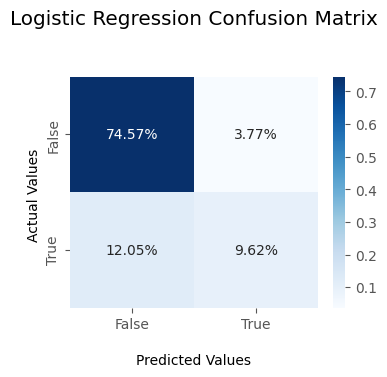

In [18]:
plot_CF(confusion_matrix(y_test,predicts[0]),models[0])

### RANDOM FOREST

In [19]:
print(classification_report(y_test,predicts[1]))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     34185
           1       0.76      0.50      0.60      9453

    accuracy                           0.86     43638
   macro avg       0.81      0.73      0.76     43638
weighted avg       0.85      0.86      0.85     43638



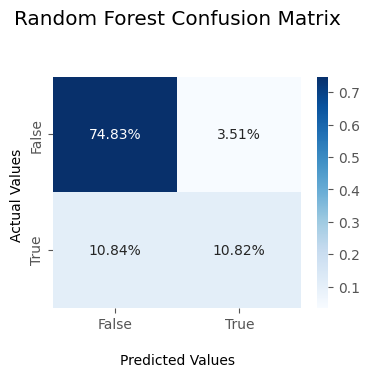

In [20]:
plot_CF(confusion_matrix(y_test,predicts[1]),models[1])

### GRADIENT BOOSTING

In [21]:
print(classification_report(y_test,predicts[2]))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     34185
           1       0.73      0.53      0.61      9453

    accuracy                           0.86     43638
   macro avg       0.81      0.74      0.76     43638
weighted avg       0.85      0.86      0.85     43638



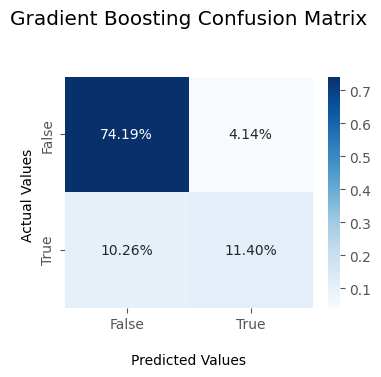

In [22]:
plot_CF(confusion_matrix(y_test,predicts[2]),models[2])

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc(lr_probs):
    ns_probs = [0 for _ in range(len(y_test))]

    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)

    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('RFC: ROC AUC=%.3f' % (lr_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='RFC')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

No Skill: ROC AUC=0.500
RFC: ROC AUC=0.698


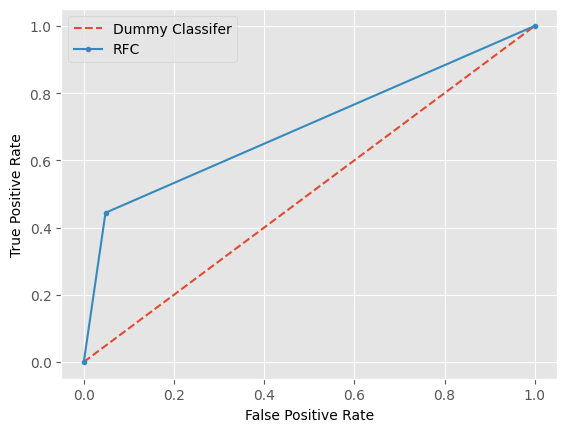

In [26]:
plot_roc(predicts[0])

No Skill: ROC AUC=0.500
RFC: ROC AUC=0.727


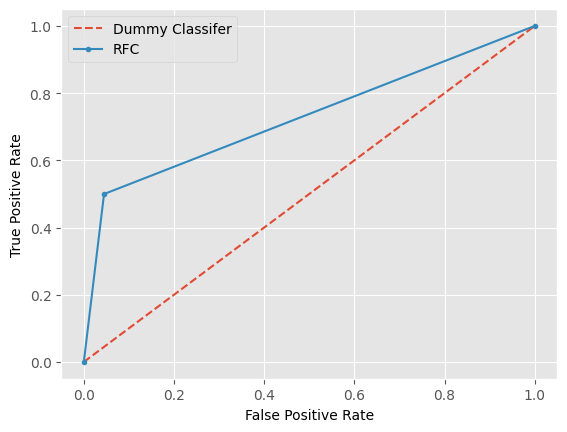

In [27]:
plot_roc(predicts[1])

No Skill: ROC AUC=0.500
RFC: ROC AUC=0.737


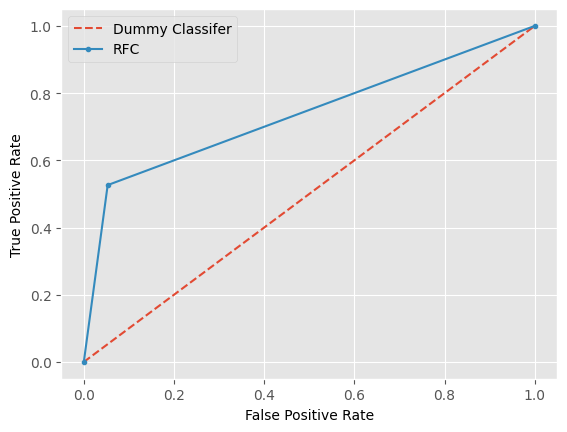

In [28]:
plot_roc(predicts[2])

# Explainer SHAP and Lime

In [40]:
#pip install --upgrade shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


'0.41.0'